# Logistic Regression

In [14]:
import io, os, sys, types
from sklearn import cross_validation
from sklearn import neighbors
from sklearn import grid_search
from sklearn import metrics
from sklearn import linear_model

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid", font_scale=1)
%matplotlib inline

In [2]:
import nbformat

from IPython import get_ipython
from IPython.core.interactiveshell import InteractiveShell

In [3]:
def find_notebook(fullname, path=None):
    """find a notebook, given its fully qualified name and an optional path
    
    This turns "foo.bar" into "foo/bar.ipynb"
    and tries turning "Foo_Bar" into "Foo Bar" if Foo_Bar
    does not exist.
    """
    name = fullname.rsplit('.', 1)[-1]
    if not path:
        path = ['']
    for d in path:
        nb_path = os.path.join(d, name + ".ipynb")
        if os.path.isfile(nb_path):
            return nb_path
        # let import Notebook_Name find "Notebook Name.ipynb"
        nb_path = nb_path.replace("_", " ")
        if os.path.isfile(nb_path):
            return nb_path

In [4]:
class NotebookLoader(object):
    """Module Loader for IPython Notebooks"""
    def __init__(self, path=None):
        self.shell = InteractiveShell.instance()
        self.path = path
    
    def load_module(self, fullname):
        """import a notebook as a module"""
        path = find_notebook(fullname, self.path)
        
        print ("importing notebook from %s" % path)
                                       
        # load the notebook object
        nb = nbformat.read(path, as_version=4)
        
        
        # create the module and add it to sys.modules
        # if name in sys.modules:
        #    return sys.modules[name]
        mod = types.ModuleType(fullname)
        mod.__file__ = path
        mod.__loader__ = self
        mod.__dict__['get_ipython'] = get_ipython
        sys.modules[fullname] = mod
        
        # extra work to ensure that magics that would affect the user_ns
        # actually affect the notebook module's ns
        save_user_ns = self.shell.user_ns
        self.shell.user_ns = mod.__dict__
        
        try:
          for cell in nb.cells:
            if cell.cell_type == 'code':
                # transform the input to executable Python
                code = self.shell.input_transformer_manager.transform_cell(cell.source)
                # run the code in themodule
                exec(code, mod.__dict__)
        finally:
            self.shell.user_ns = save_user_ns
        return mod

In [5]:
class NotebookFinder(object):
    """Module finder that locates IPython Notebooks"""
    def __init__(self):
        self.loaders = {}
    
    def find_module(self, fullname, path=None):
        nb_path = find_notebook(fullname, path)
        if not nb_path:
            return
        
        key = path
        if path:
            # lists aren't hashable
            key = os.path.sep.join(path)
        
        if key not in self.loaders:
            self.loaders[key] = NotebookLoader(path)
        return self.loaders[key]

In [6]:
sys.meta_path.append(NotebookFinder())

importing notebook from EDA.ipynb
['Station' 'Date' 'Tmax' 'Tmin' 'Tavg' 'Depart' 'DewPoint' 'WetBulb' 'Heat'
 'Cool' 'Sunrise' 'Sunset' 'CodeSum' 'Depth' 'Water1' 'SnowFall'
 'PrecipTotal' 'StnPressure' 'SeaLevel' 'ResultSpeed' 'ResultDir'
 'AvgSpeed']
Station        0
Date           0
Tmax           0
Tmin           0
Tavg           0
Depart         0
DewPoint       0
WetBulb        0
Heat           0
Cool           0
Sunrise        0
Sunset         0
CodeSum        0
Depth          0
Water1         0
SnowFall       0
PrecipTotal    0
StnPressure    0
SeaLevel       0
ResultSpeed    0
ResultDir      0
AvgSpeed       0
dtype: int64
Station          int64
Date            object
Tmax             int64
Tmin             int64
Tavg            object
Depart          object
DewPoint         int64
WetBulb         object
Heat            object
Cool            object
Sunrise         object
Sunset          object
CodeSum         object
Depth           object
Water1          object
SnowFall      

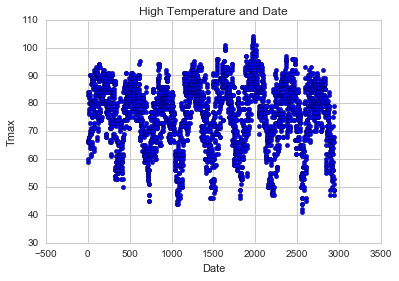

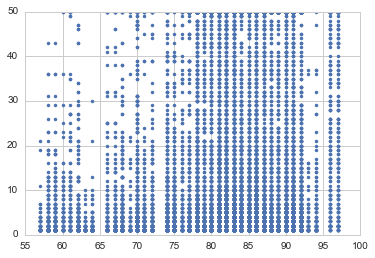

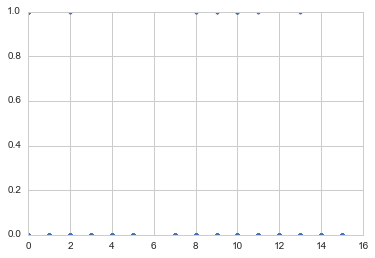

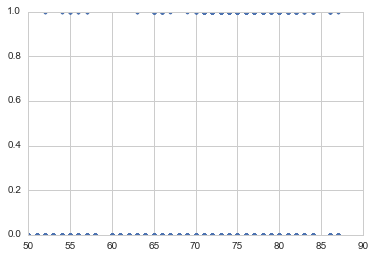

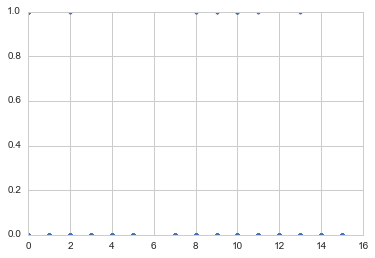

Numerical columns:
set(['AddressNumberAndStreet_7900  S CHICAGO AVE, Chicago, IL', 'Street_ E 111TH ST', 'Street_ S CALIFORNIA', 'Trap_T081', 'Address_5800 North Pulaski Road, Chicago, IL 60646, USA', 'Trap_T083', 'Station', 'Trap_T085', 'Trap_T084', 'Trap_T086', 'AddressNumberAndStreet_1100  S STATE ST, Chicago, IL', 'Trap_T088', 'Address_6500 North Oak Park Avenue, Chicago, IL 60631, USA', 'Address_1100 Roosevelt Road, Chicago, IL 60608, USA', 'Tmin', 'Trap_T160', 'Trap_T161', 'Street_ W GRANVILLE AVE', 'StnPressure', 'AddressNumberAndStreet_1500  N LONG AVE, Chicago, IL', 'Street_ S AVENUE G', 'Street_ S CORNELL AVE', 'Address_3900 North Springfield Avenue, Chicago, IL 60618, USA', 'Street_ S AVENUE L', 'Street_ W GREENLEAF AVE', 'AddressNumberAndStreet_2100  S HAMLIN AVE, Chicago, IL', 'AddressNumberAndStreet_2500  S THROOP, Chicago, IL', 'Street_ W MONTROSE DR', 'Trap_T018', 'Trap_T019', 'Street_ S STONY ISLAND AVE', 'Trap_T012', 'Trap_T013', 'AddressNumberAndStreet_1300  S TORREN

In [7]:
import EDA

In [8]:
EDA.final_data.columns.values


array(['Date', 'Block', 'Latitude', 'Longitude', 'AddressAccuracy',
       'NumMosquitos', 'WnvPresent', 'Station', 'Tmax', 'Tmin', 'Tavg',
       'Depart', 'DewPoint', 'WetBulb', 'Heat', 'Cool', 'Sunrise',
       'Sunset', 'CodeSum', 'Depth', 'Water1', 'SnowFall', 'PrecipTotal',
       'StnPressure', 'SeaLevel', 'ResultSpeed', 'ResultDir', 'AvgSpeed',
       'Species_CULEX ERRATICUS', 'Species_CULEX PIPIENS',
       'Species_CULEX PIPIENS/RESTUANS', 'Species_CULEX RESTUANS',
       'Species_CULEX SALINARIUS', 'Species_CULEX TARSALIS',
       'Species_CULEX TERRITANS', 'Street_  W ARMITAGE AVENUE',
       'Street_ E 105TH ST', 'Street_ E 111TH ST', 'Street_ E 115TH ST',
       'Street_ E 118TH ST', 'Street_ E 130TH ST', 'Street_ E 138TH ST',
       'Street_ E 67TH ST', 'Street_ E 91ST PL', 'Street_ E 91ST ST',
       'Street_ E RANDOLPH ST', 'Street_ N ASHLAND AVE',
       'Street_ N ASHLAND AVE OVERPASS', 'Street_ N AUSTIN AVE',
       'Street_ N AVONDALE AVE', 'Street_ N CALIFORNIA A

## Create cross validation sets

In [9]:
# set the target variable
target = 'WnvPresent'

#EDA.final_data

#list(EDA.final_data.columns.values)

# Set X and y
X = EDA.final_numeric_data.drop([target], axis=1)
y = EDA.final_numeric_data[target]

#EDA.final_data

print X



       Block   Latitude  Longitude  AddressAccuracy  NumMosquitos  Station  \
0         41  41.954690 -87.800991                9             1        1   
1         41  41.954690 -87.800991                9             1        2   
2         41  41.954690 -87.800991                9             1        1   
3         41  41.954690 -87.800991                9             1        2   
4         62  41.994991 -87.769279                9             1        1   
5         62  41.994991 -87.769279                9             1        2   
6         79  41.974089 -87.824812                8             1        1   
7         79  41.974089 -87.824812                8             1        2   
8         79  41.974089 -87.824812                8             4        1   
9         79  41.974089 -87.824812                8             4        2   
10        15  41.921600 -87.666455                8             2        1   
11        15  41.921600 -87.666455                8             

In [10]:
# Create separate training and test sets with 60/40 train/test split
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.4, random_state=42)

## Build a model

In [11]:
# Instantiate logistic regression classifier using default params
lm = linear_model.LogisticRegression()

# Train logistic regression classifier on training set
lm.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Evaluate te Model

In [12]:
# Check model accuracy on test set
print "Accuracy: %0.3f" % lm.score(X_test, y_test)

Accuracy: 0.946


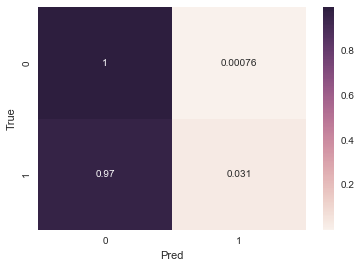

Confusion Matrix:
[[7941    6]
 [ 444   14]]


In [15]:
# Get confusion matrix on test set
y_pred = lm.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

ax = plt.axes()
sns.heatmap(cm_normalized, annot=True)
ax.set_ylabel('True')
ax.set_xlabel('Pred')
plt.show()

print "Confusion Matrix:"
print cm

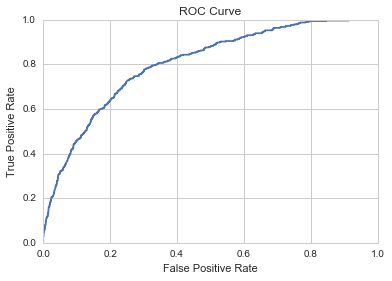

ROC AUC: 0.802


In [16]:
# Plot ROC curve and get AUC score
y_pred_proba = lm.predict_proba(X_test)[:,1]

# Determine the false positive and true positive rates
fpr, tpr, t = metrics.roc_curve(y_test, y_pred_proba)

 
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

# Get ROC AUC score
print 'ROC AUC: %0.3f' % metrics.roc_auc_score(y_test, y_pred_proba)